Get database session


In [3]:
# Import the connection function from the snowexsql library
from snowexsql.db import get_db
from sqlalchemy import inspect
from snowexsql.conversions import query_to_geopandas, query_to_pandas
from snowexsql.db import get_table_attributes
from sqlalchemy.sql import func

import shapely.geometry
from geoalchemy2.shape import from_shape
import geoalchemy2.functions as gfunc
import matplotlib.pyplot as plt
import datetime

%config InlineBackend.figure_format='retina'

# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@db.snowexdata.org/snowex'

engine, session = get_db(db_name)

print('SnowEx Database successfully loaded!')

from snowexsql.data import PointData, LayerData, ImageData, SiteData

# tables available in database ['spatial_ref_sys', 'points', 'layers', 'sites', 'images']


SnowEx Database successfully loaded!


In [8]:
# We're trying to count all ASO snow depth tiles within this bbox
bbox_WSEN = 742000, 4322000, 747000, 4325000 # EPSG 32612?
x1, y1, x2, y2 = bbox_WSEN
polygon = shapely.geometry.Polygon([[x1, y1], [x1, y2], [x2, y2], [x2, y1]]) # used box() before
wkb_element = from_shape(polygon, srid=26912) # which srid is right? #srid = 26912

# Retrieve some of the GPR data
dataset = 'two_way_travel'
query = session.query(PointData.geom, PointData.easting, PointData.northing, PointData.value, PointData.date)

query = query.filter(PointData.type == dataset)

query = query.filter(PointData.date <=(datetime.date(2020,2,2))) # or PointData.date <=( datetime.date(2020,2,6))) 
#query = query.filter(PointData.date == "2020-02-04")

# Filter the query by bounding box (the part that doesn't work)
query = query.filter(gfunc.ST_Within(PointData.geom,wkb_element))

result = query.count()
print(result)



/tmp/ipykernel_81/794663618.py:19: SAWarning: UserDefinedType Geometry(geometry_type='POINT') will not produce a cache key because the ``cache_ok`` attribute is not set to True.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Set this attribute to True if this type object's state is safe to use in a cache key, or False to disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)
  result = query.count()


1413563


In [9]:
# data to geopanda data frame

GPR1 = query_to_geopandas(query,engine)

In [10]:
# to visualize the table 
GPR1.head()


,geom,easting,northing,value,date
0,POINT (743148.428 4324346.715),743148.428029,4.324347e+06,8.3,2020-01-28
1,POINT (743147.838 4324346.512),743147.838029,4.324347e+06,8.4,2020-01-28
2,POINT (743148.291 4324346.702),743148.291029,4.324347e+06,8.3,2020-01-28
3,POINT (743148.404 4324346.714),743148.404029,4.324347e+06,8.3,2020-01-28
4,POINT (743148.276 4324346.699),743148.276029,4.324347e+06,8.4,2020-01-28


In [11]:
#rename column  ( value to twt)
GPR1.rename(columns={'value':'twt'},inplace=True )


Text(7.875, 0.5, 'Northing [m]')

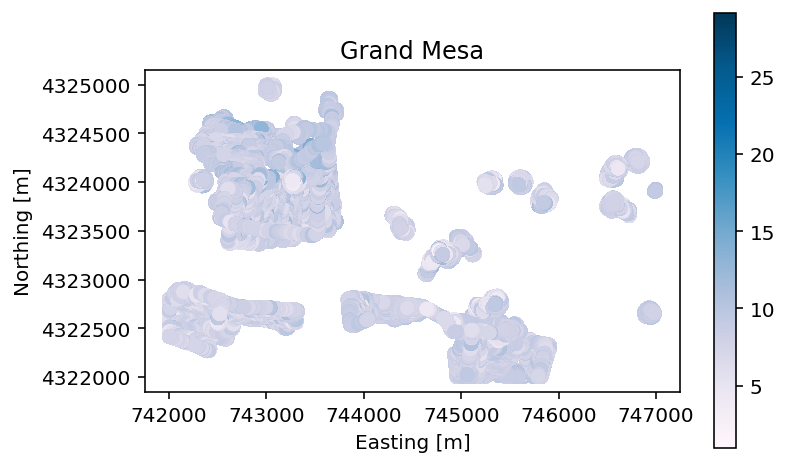

In [12]:
#plot to see bounding box
# Get the Matplotlib Axes object from the dataframe object, color points by snow depth value
ax = GPR1.plot(column='twt', legend=True, cmap='PuBu')
# Use non-scientific notation for x and y ticks
ax.ticklabel_format(style='plain', useOffset=False)
# Set the various plots x/y labels and title.
ax.set_title('Grand Mesa' )
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')


In [22]:
# We're trying to count all ASO snow depth tiles within this bbox
bbox_WSEN = 742000, 4322000, 747000, 4325000 # EPSG 32612?
x1, y1, x2, y2 = bbox_WSEN
polygon = shapely.geometry.Polygon([[x1, y1], [x1, y2], [x2, y2], [x2, y1]]) # used box() before
wkb_element = from_shape(polygon, srid=26912) # which srid is right? #srid = 26912

# Retrieve some of the GPR data
dataset = 'two_way_travel'
query = session.query(PointData.geom, PointData.easting, PointData.northing, PointData.value, PointData.date)

query = query.filter(PointData.type == dataset)

query = query.filter(PointData.date >=(datetime.date(2020,2,4))) # or PointData.date <=( datetime.date(2020,2,6))) 
#query = query.filter(PointData.date == "2020-02-04")

# Filter the query by bounding box (the part that doesn't work)
query = query.filter(gfunc.ST_Within(PointData.geom,wkb_element))

result = query.count()
print(result)

#result = session.query(PointData.date).filter(PointData.instrument == 'two_way_time').distinct().all()
#print(result)

/tmp/ipykernel_81/1455693591.py:19: SAWarning: UserDefinedType Geometry(geometry_type='POINT') will not produce a cache key because the ``cache_ok`` attribute is not set to True.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Set this attribute to True if this type object's state is safe to use in a cache key, or False to disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)
  result = query.count()


395584


Text(7.875, 0.5, 'Northing [m]')

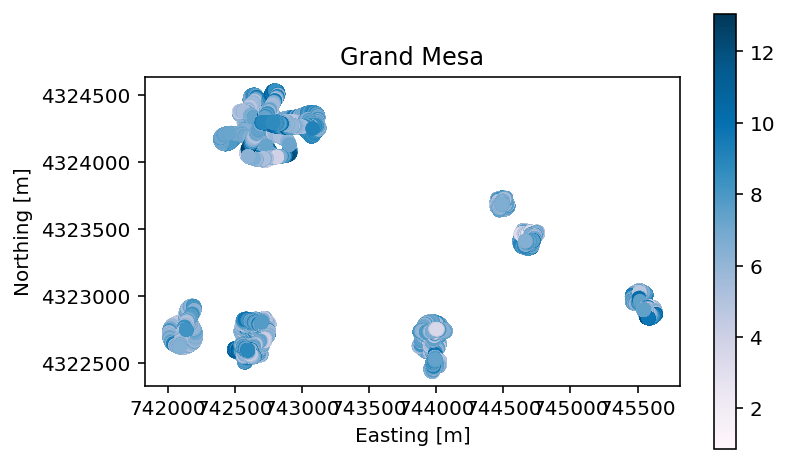

In [14]:
# data to geopanda data frame

GPR2 = query_to_geopandas(query,engine)

#rename column  ( value to twt)
GPR2.rename(columns={'value':'twt'},inplace=True )

#plot to see bounding box
# Get the Matplotlib Axes object from the dataframe object, color points by snow depth value
ax = GPR2.plot(column='twt', legend=True, cmap='PuBu')
# Use non-scientific notation for x and y ticks
ax.ticklabel_format(style='plain', useOffset=False)
# Set the various plots x/y labels and title.
ax.set_title('Grand Mesa' )
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')


In [15]:
GPR2.head()


,geom,easting,northing,twt,date
0,POINT (742698.194 4324289.013),742698.194465,4.324289e+06,11.282656,2020-02-07
1,POINT (742698.149 4324289.102),742698.149312,4.324289e+06,11.430625,2020-02-07
2,POINT (742690.166 4324291.166),742690.165839,4.324291e+06,7.509440,2020-02-07
3,POINT (742698.172 4324288.988),742698.172375,4.324289e+06,11.356641,2020-02-07
4,POINT (742689.916 4324291.333),742689.916496,4.324291e+06,7.472448,2020-02-07


In [ ]:
result = session.query(PointData.type)